In [1]:
import data
import torch
from torch.utils.data import TensorDataset
import numpy as np
import gans.w_gan as wgan
import gans.w_gp_gan as wgpgan
import gans.vae as vae
import gans.ns_gan as nsgan
import gans.mm_gan as mmgan
import gans.ls_gan as lsgan
import gans.dra_gan as dragan
import gans.be_gan as began
from gans.load_data import get_data

In [2]:
i = 0
j = 0
distributions = ['normal', 'beta', 'exponential', 'gamma', 'gumbel', 'laplace']
pdfs = ['uniform', 'random']

In [3]:
def preprocess(generator, samples, BATCH_SIZE = 100):
    data_train = torch.from_numpy(generator.generate_samples(samples)).float()
    data_val = torch.from_numpy(generator.generate_samples(samples)).float()
    data_test = torch.from_numpy(generator.generate_samples(samples)).float()
    labels_train = torch.from_numpy(np.zeros((samples,1)))
    train = TensorDataset(data_train, labels_train)
    val =TensorDataset(data_val, labels_train)
    test = TensorDataset(data_test, labels_train)
    train_iter = torch.utils.data.DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
    val_iter = torch.utils.data.DataLoader(val, batch_size=BATCH_SIZE, shuffle=True)
    test_iter = torch.utils.data.DataLoader(test, batch_size=BATCH_SIZE, shuffle=True)
    return train_iter, val_iter, test_iter

# Multivariate Distributions Example

In [4]:
# generator = data.Distribution(distributions[i], 200)
# generator.save_dist('output_file.pickle')  # Saving the generator

# Mixture Models Example

In [5]:
# generator = data.MixtureDistribution(distributions[i], distributions[j], n_mixtures=15, dim=200)
# generator.get_log_likelihood(data_train)
# generator.save_dist()

# Circles Example

In [6]:
# generator = data.CirclesDatasetGenerator(size=256, n_circles=4, random_colors=True, random_sizes=True, modes=20)
# x = generator.generate_samples(10000)
# print(len(x))
# print(x[0].shape)
# generator.generate_samples_to_directory(5000, './dataset_1')
# generator.save_generator('./generator1.pickle')

# MNIST Data

In [7]:
train_iter, val_iter, test_iter = get_data()

In [8]:
train_iter.dataset.data_tensor.shape

torch.Size([50000, 1, 28, 28])

# Preprocessing Synthetic Data

In [9]:
generator = data.Distribution(distributions[i], 784) # Only works for 784...

In [10]:
train_iter, val_iter, test_iter = preprocess(generator, 10000)

In [11]:
train_iter.dataset.data_tensor.shape

torch.Size([10000, 784])

# GAN Time! Wooo

In [12]:
n = 1

# WGAN

A Jupyter Widget

Epoch[1/1], G Loss: -0.0097, D Loss: -1.1499
torch.Size([25, 784])


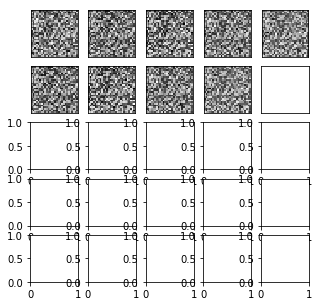

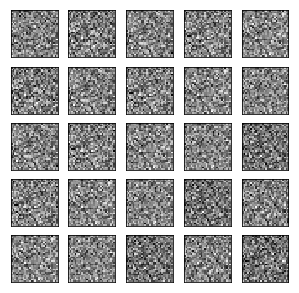

In [15]:
model = wgan.GAN(image_size = 784, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = wgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 5e-5, D_lr = 5e-5, D_steps = 5, clip = 0.01)

# WGAN GP

A Jupyter Widget

Epoch[1/1], G Loss: -0.0179, D Loss: -0.9433


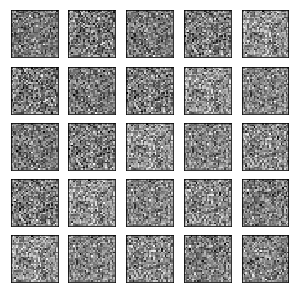

In [16]:
model = wgpgan.GAN(image_size = 784, hidden_dim = 256, z_dim = 128) 
if torch.cuda.is_available():
    model = model.cuda()
trainer = wgpgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 1e-4, D_lr = 1e-4, D_steps = 5)

# VAE

A Jupyter Widget

Epoch[1/1], Total Loss: -562974.8024, Reconst Loss: -595048.5182, KL Div: 32073.7155609, Val Loss: -684708.1138


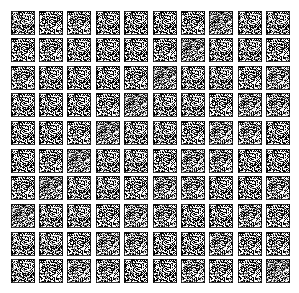

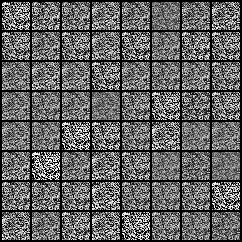

A Jupyter Widget

Epoch[1/3], Total Loss: -592867.1147, Reconst Loss: -617508.3284, KL Div: 24641.2118356, Val Loss: -691744.0353


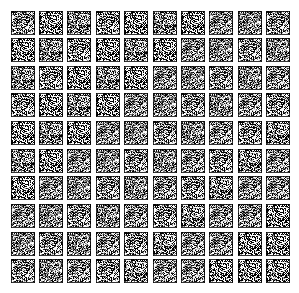

Epoch[2/3], Total Loss: -692019.3697, Reconst Loss: -700180.1381, KL Div: 8160.7684717, Val Loss: -703135.8972


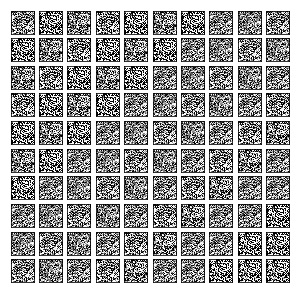

Epoch[3/3], Total Loss: -698950.1397, Reconst Loss: -705200.0291, KL Div: 6249.8922217, Val Loss: -706459.6941


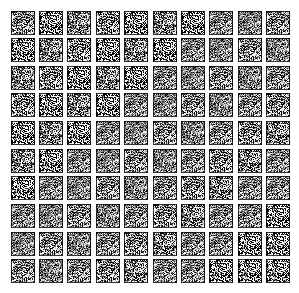

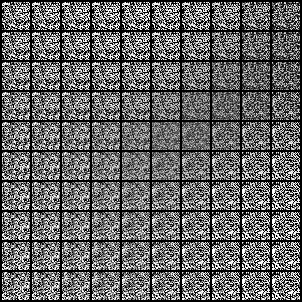

In [17]:
model = vae.VAE(image_size = 784, hidden_dim = 400, z_dim = 20)
if torch.cuda.is_available():
    model.cuda()
trainer = vae.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model, num_epochs = n)

# Explore latent space
viz = vae.Viz(train_iter, val_iter, test_iter, model)
viz.make_all()

# NS GAN

A Jupyter Widget

Epoch[1/1], G Loss: 1.9777, D Loss: 0.3429


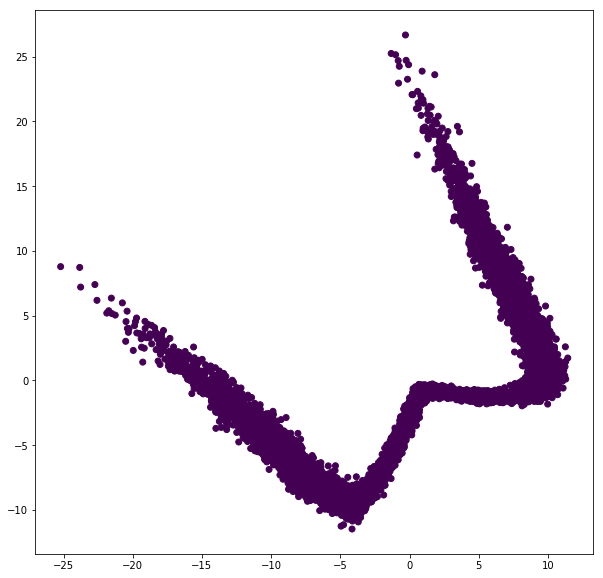

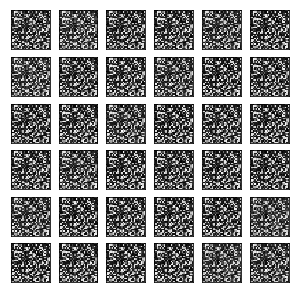

In [18]:
model = nsgan.GAN(image_size = 784, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = nsgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 2e-4, D_lr = 2e-4, D_steps = 1)

# MM GAN

G pre-trained for 5 training steps.


/Users/heart/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1189: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


A Jupyter Widget

Epoch[1/1], G Loss: -0.1629, D Loss: 0.3328


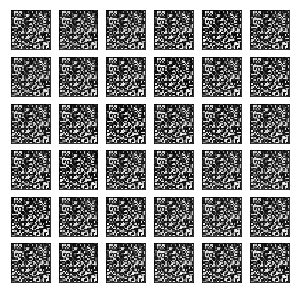

In [19]:
model = mmgan.GAN(image_size = 784, hidden_dim = 400, z_dim = 100)
if torch.cuda.is_available():
    model = model.cuda()
trainer = mmgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 2e-4, D_lr = 2e-4, G_init = 5, D_steps = 1)

# LS GAN

A Jupyter Widget

Epoch[1/1], G Loss: 0.3048, D Loss: 0.0585


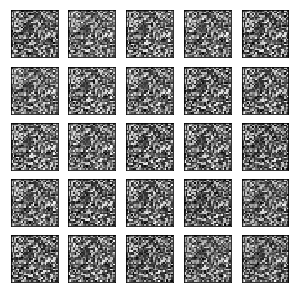

In [20]:
model = lsgan.GAN(image_size = 784, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = lsgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 1e-4, D_lr = 1e-4, D_steps = 1)

# DRA GAN

A Jupyter Widget

Epoch[1/1], G Loss: 1.0133, D Loss: 8.8060


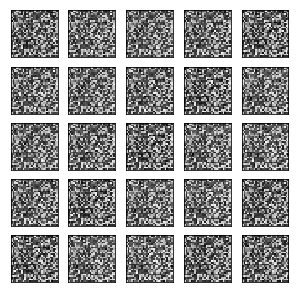

In [21]:
model = dragan.GAN(image_size = 784, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = dragan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 1e-4, D_lr = 1e-4, D_steps = 1)

# BE GAN

A Jupyter Widget

Epoch[1/1], G Loss: 0.0998, D Loss: 0.8263, K: 0.0317, Convergence Measure: 0.8936


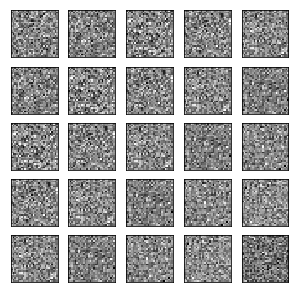

In [22]:
model = began.GAN(image_size = 784, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = began.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 1e-4, D_lr = 1e-4, D_steps = 1)